In [7]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('./ea_sports_fc_25/all_players.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,...,Nation,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,0,0,1,Kylian Mbappé,91,97,90,80,92,36,...,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
1,1,1,2,Rodri,91,66,80,86,84,87,...,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
2,2,2,4,Erling Haaland,91,88,92,70,81,45,...,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
3,3,3,5,Jude Bellingham,90,80,87,83,88,78,...,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
4,4,4,7,Vini Jr.,90,95,84,81,91,29,...,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN


In [8]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17737 entries, 0 to 17736
Data columns (total 58 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           17737 non-null  int64  
 1   Unnamed: 0             17737 non-null  int64  
 2   Rank                   17737 non-null  int64  
 3   Name                   17737 non-null  object 
 4   OVR                    17737 non-null  int64  
 5   PAC                    17737 non-null  int64  
 6   SHO                    17737 non-null  int64  
 7   PAS                    17737 non-null  int64  
 8   DRI                    17737 non-null  int64  
 9   DEF                    17737 non-null  int64  
 10  PHY                    17737 non-null  int64  
 11  Acceleration           17737 non-null  int64  
 12  Sprint Speed           17737 non-null  int64  
 13  Positioning            17737 non-null  int64  
 14  Finishing              17737 non-null  int64  
 15  Sh

In [9]:
print('Dataset shape')
df.shape

Dataset shape


(17737, 58)

In [10]:
df.drop('Unnamed: 0', axis=1, inplace = True)
df.head(5)

,Unnamed: 0.1,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,...,Nation,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,0,1,Kylian Mbappé,91,97,90,80,92,36,78,...,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
1,1,2,Rodri,91,66,80,86,84,87,85,...,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
2,2,4,Erling Haaland,91,88,92,70,81,45,88,...,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
3,3,5,Jude Bellingham,90,80,87,83,88,78,83,...,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
4,4,7,Vini Jr.,90,95,84,81,91,29,69,...,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN


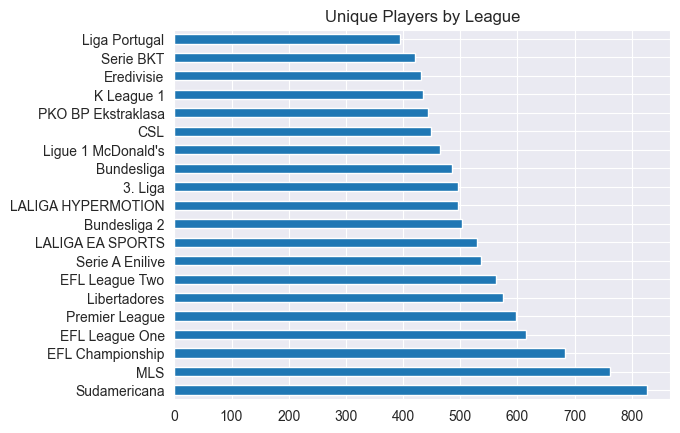

In [11]:
df['League'].value_counts().head(20).plot(kind='barh')
plt.title("Unique Players by League")
plt.show()

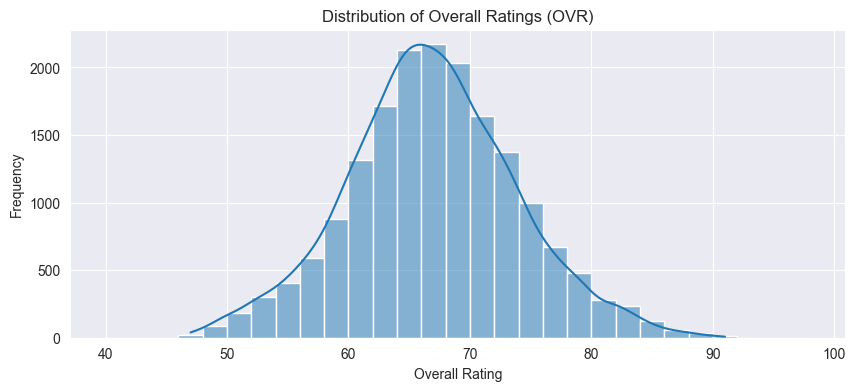

In [12]:
bins = np.arange(40,100,2)
plt.figure(figsize=(10, 4))
sns.histplot(x = 'OVR', data = df, bins = bins, kde=True)
plt.title('Distribution of Overall Ratings (OVR)')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

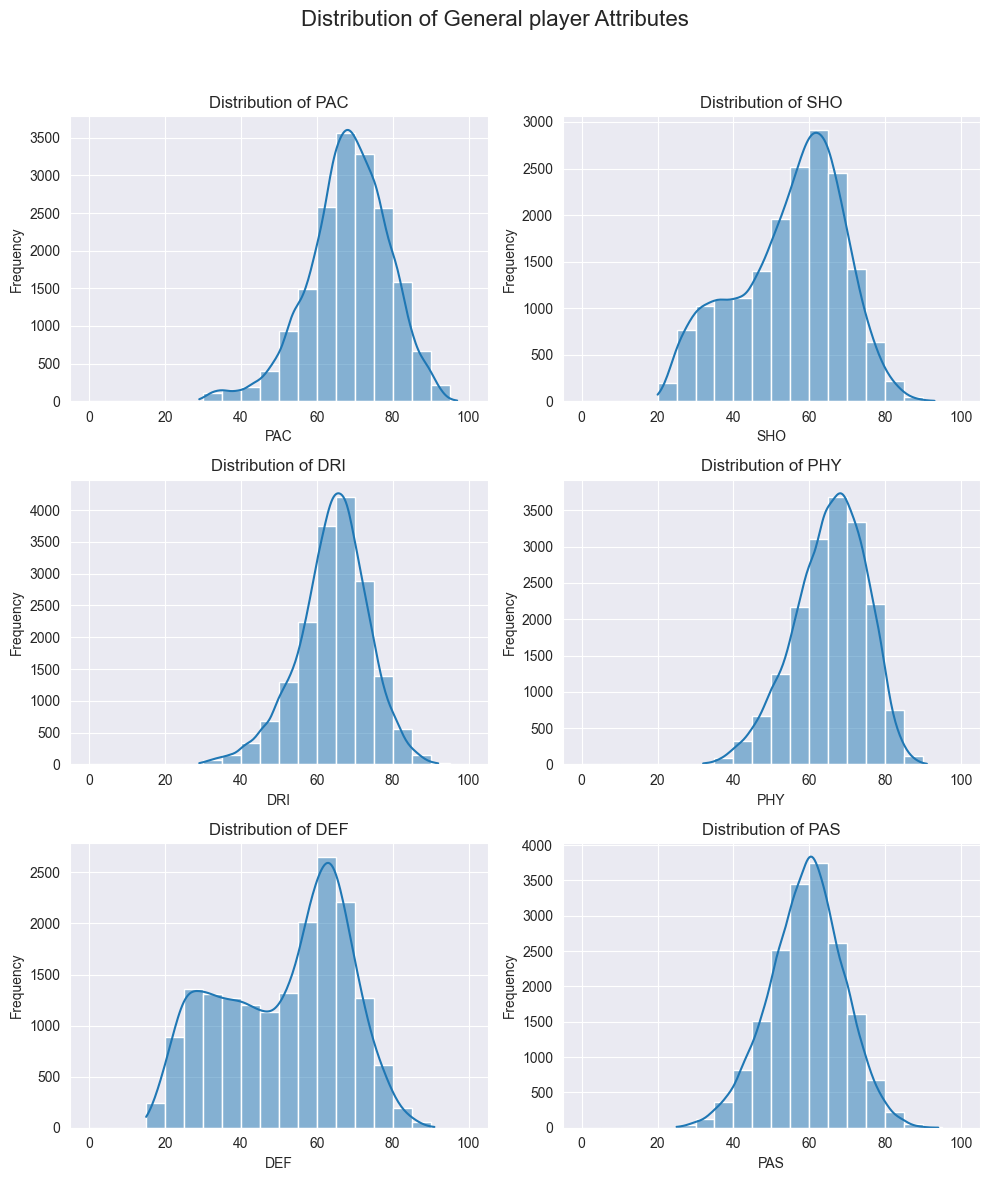

In [13]:
attributes = ['PAC', 'SHO', 'DRI', 'PHY', 'DEF', 'PAS']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))
fig.suptitle('Distribution of General player Attributes', fontsize=16)
axes = axes.flatten()
bins = np.arange(0,105,5)
for i, attr in enumerate(attributes):
    sns.histplot(df[attr], bins=bins, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {attr}')
    axes[i].set_ylabel('Frequency')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

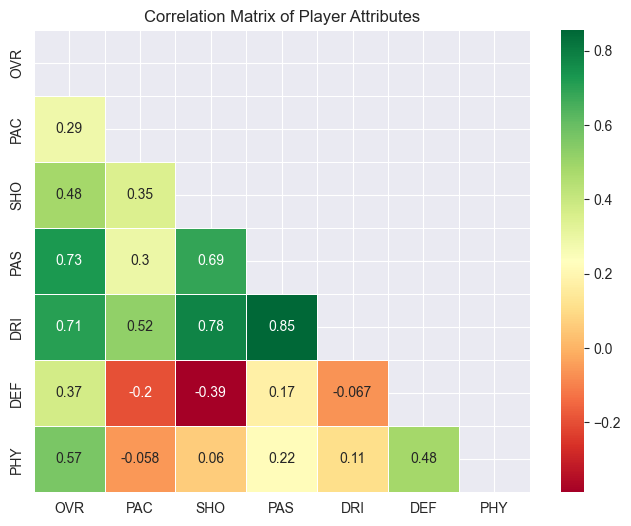

In [14]:
corr_matrix = df[['OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=0.5, mask = mask)
plt.title('Correlation Matrix of Player Attributes')
plt.show()

In [15]:
df[['Name', 'Position','OVR', 'Team', 'League', 'Age', 'PAC', 'SHO','DEF','PHY','DRI','PAS']].sort_values(by='OVR', ascending=False).head(10)

,Name,Position,OVR,Team,League,Age,PAC,SHO,DEF,PHY,DRI,PAS
0,Kylian Mbappé,ST,91,Real Madrid,LALIGA EA SPORTS,25,97,90,36,78,92,80
16161,Aitana Bonmatí,CM,91,FC Barcelona,Liga F,26,81,86,77,75,91,86
2,Erling Haaland,ST,91,Manchester City,Premier League,24,88,92,45,88,81,70
1,Rodri,CDM,91,Manchester City,Premier League,28,66,80,87,85,84,86
16163,Caroline Graham Hansen,RW,90,FC Barcelona,Liga F,29,89,87,47,76,90,88
16164,Sam Kerr,ST,90,Chelsea,Barclays WSL,31,85,88,42,83,90,74
16162,Alexia Putellas,CM,90,FC Barcelona,Liga F,30,82,89,72,78,91,90
4,Vini Jr.,LW,90,Real Madrid,LALIGA EA SPORTS,24,95,84,29,69,91,81
3,Jude Bellingham,CAM,90,Real Madrid,LALIGA EA SPORTS,21,80,87,78,83,88,83
6,Harry Kane,ST,90,FC Bayern München,Bundesliga,31,65,93,49,82,83,84


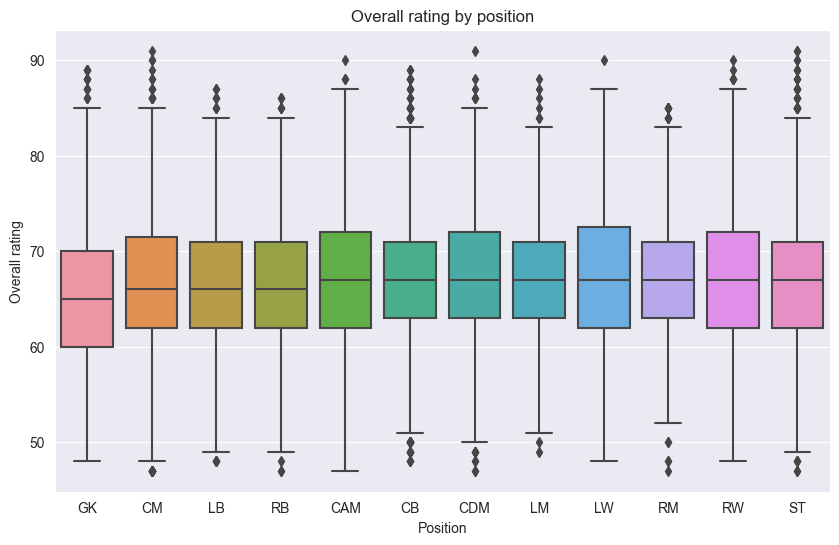

In [16]:
positions = df.groupby('Position')['OVR'].median().sort_values().index
plt.figure(figsize=(10, 6))

sns.boxplot(x='Position',y='OVR', data = df, order = positions)
plt.title('Overall rating by position')
plt.ylabel('Overall rating')
plt.show()

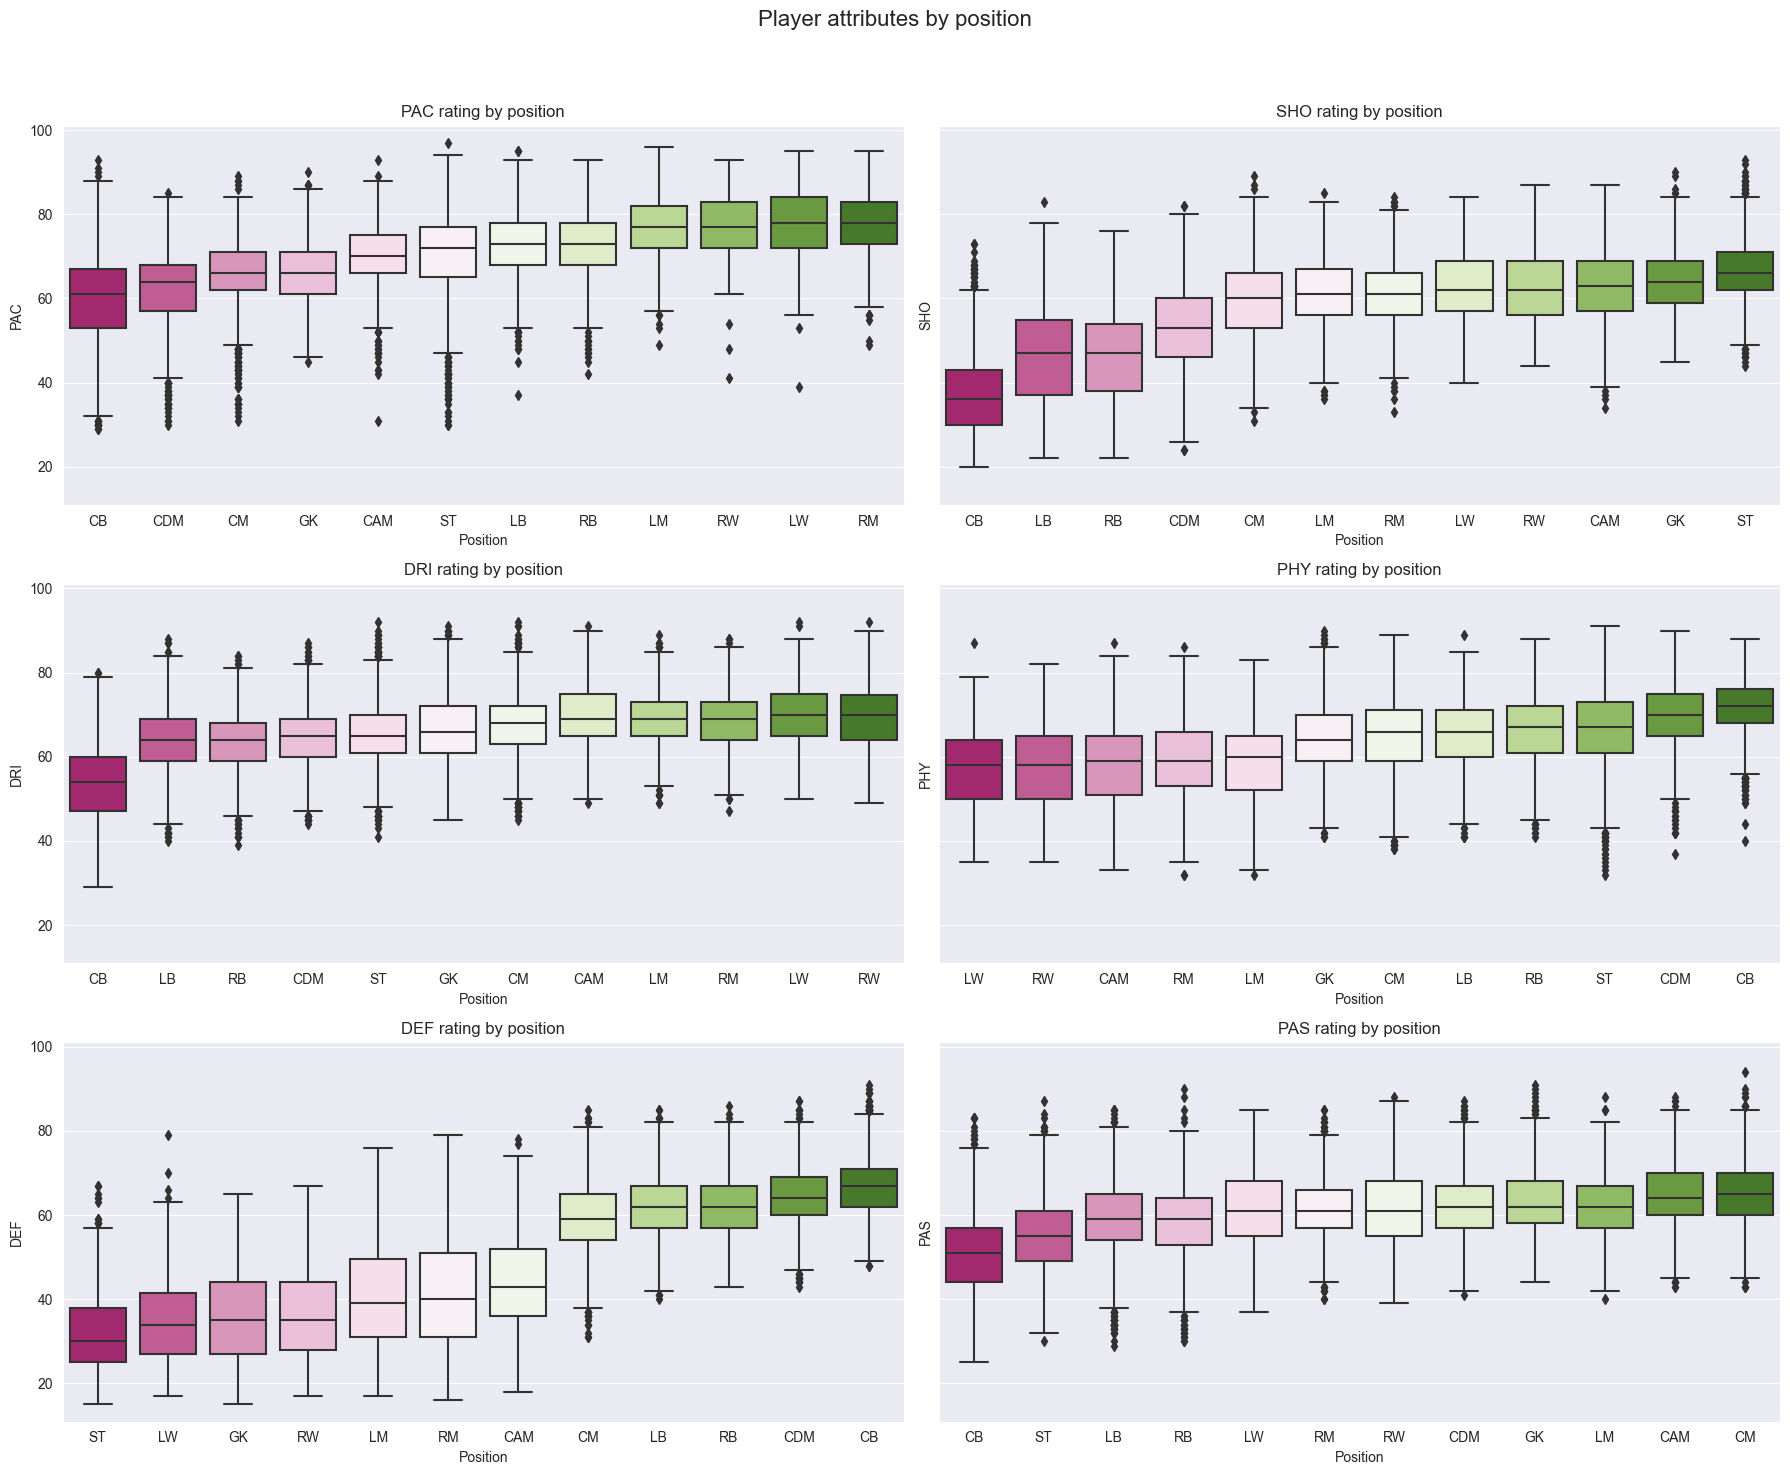

In [17]:
attributes = ['PAC', 'SHO', 'DRI', 'PHY', 'DEF', 'PAS']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15), sharey=True,)
fig.suptitle('Player attributes by position', fontsize=16)
axes = axes.flatten()
for i, attr in enumerate(attributes):
    order = df.groupby('Position')[attr].median().sort_values().index
    sns.boxplot(x='Position', y=attr, data=df, ax=axes[i], order=order, palette = 'PiYG')
    axes[i].set_title(f'{attr} rating by position')
    axes[i].set_ylabel(f'{attr}')
    axes[i].set_xlabel('Position')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

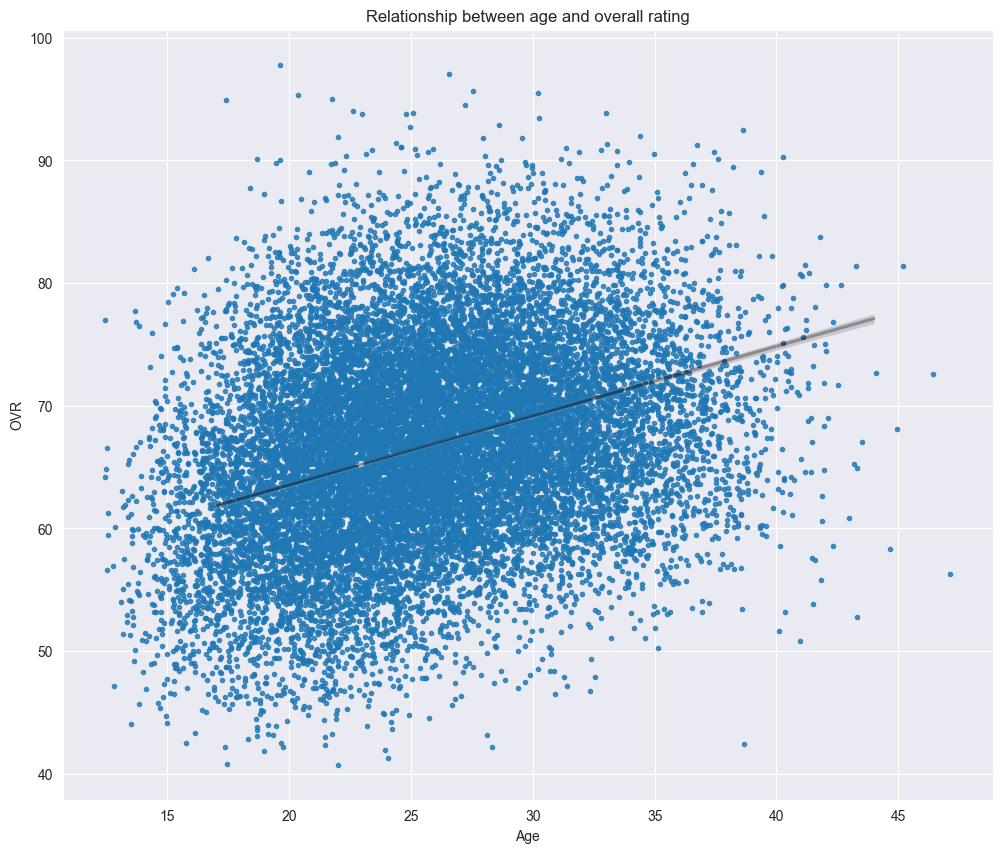

In [18]:
fig, axes = plt.subplots(figsize=(12, 10))

sns.regplot(x = 'Age', y = 'OVR', data = df, marker = '.', x_jitter = np.std(df.Age), 
            y_jitter = np.std(df.OVR),line_kws = {'alpha':0.3, 'color':'k'})
plt.title("Relationship between age and overall rating")
plt.show()

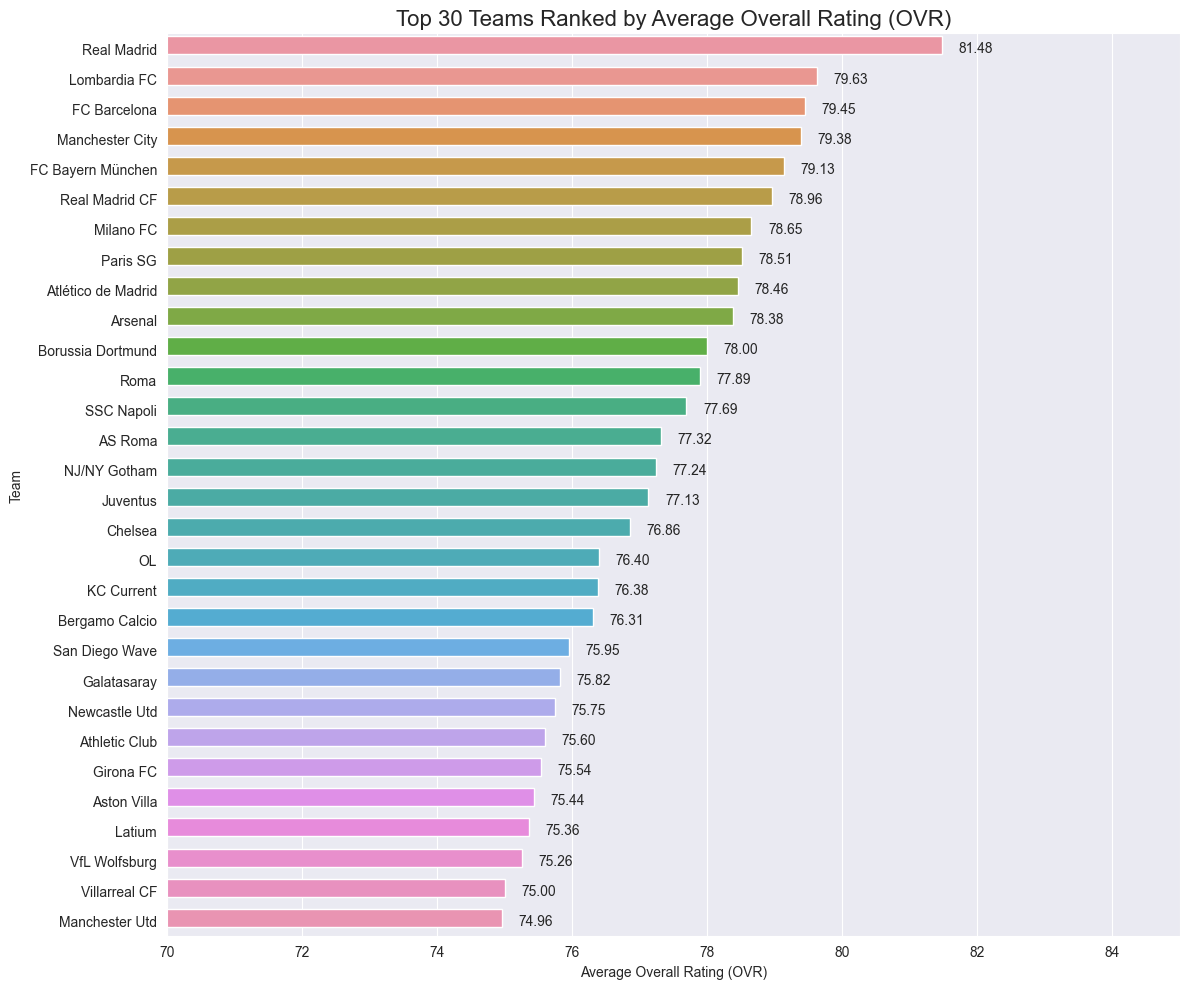

In [22]:
team_avg_ovr = df.groupby(['Team'])['OVR'].mean().sort_values(ascending=False).reset_index().head(30)
plt.figure(figsize=(12, 10))
bar_plot = sns.barplot(x='OVR', y='Team', data=team_avg_ovr)
for bar in bar_plot.patches:
    bar.set_height(0.6)
plt.title('Top 30 Teams Ranked by Average Overall Rating (OVR)', fontsize=16)
plt.xlabel('Average Overall Rating (OVR)')
plt.xlim([70,85])
plt.ylabel('Team')
for index, (team, ovr) in enumerate(zip(team_avg_ovr['Team'], team_avg_ovr['OVR'])):
    plt.text(ovr + 0.5, index, f'{ovr:.2f}', va='center', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

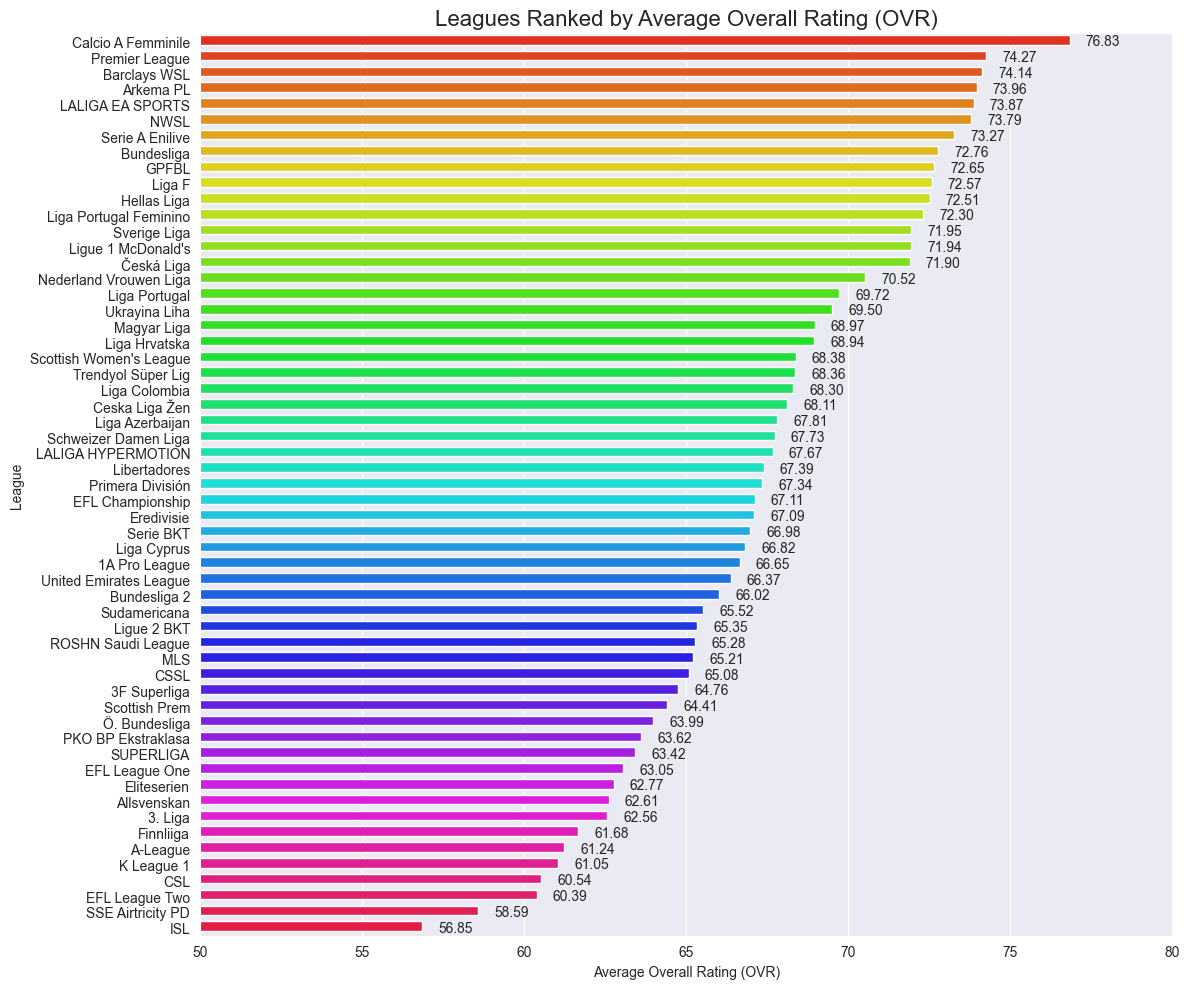

In [23]:
league_avg_ovr = df.groupby(['League'])['OVR'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 10))  # Increase the figure height if needed
bar_plot = sns.barplot(x='OVR', y='League', data=league_avg_ovr, palette='hsv')
for bar in bar_plot.patches:
    bar.set_height(0.6)  # Adjust the width as needed
plt.title('Leagues Ranked by Average Overall Rating (OVR)', fontsize=16)
plt.xlabel('Average Overall Rating (OVR)')
plt.xlim([50,80])
plt.ylabel('League')
for index, (league, ovr) in enumerate(zip(league_avg_ovr['League'], league_avg_ovr['OVR'])):
    plt.text(ovr + 0.5, index, f'{ovr:.2f}', va='center', ha='left', fontsize=10)
plt.tight_layout()
plt.show()